## **공통 라이브러리 및 드라이브 연동**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt 
import math
import cv2
impath = '/content/drive/My Drive/Colab_Notebooks/Image_processing/image/lena_grey.bmp' #Grey_scale image만 가능

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1번 Generate random image (MxN) noise**


> **Gaussian_noise**


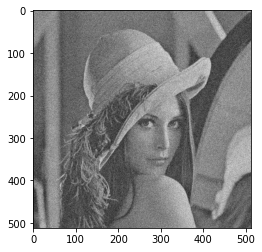

In [ ]:
def gaussian_noise(M,N):
    noise = np.random.normal(0,25,M*N) # sigma = 25인 랜덤한 가우시안 분포 수를 M*N개 저장
    noise = noise.reshape(M,N) # M*N행렬로 변환
    noise = noise.astype('int16') # int16 타입으로 변환
    return noise
image = cv2.imread(impath, cv2.IMREAD_GRAYSCALE) #image 읽기
gau_noise = gaussian_noise(512,512) # gau_noise에 noise 저장
gaussian_image = image + gau_noise # image에 noise 씌우기
plt.imshow(gaussian_image,cmap='gray')


> **Uniform_noise**

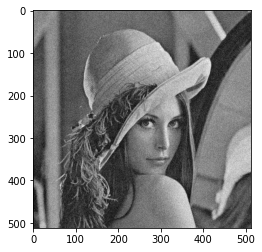

In [ ]:
def uniform_noise(M,N):
    noise = np.random.uniform(0,50,M*N) # 0~50까지의 랜덤하고 uniform한 수를 M*N개 행렬에 저장
    noise = noise.reshape(M,N) # M*N행렬로 변환
    noise = noise.astype('int16') # int16 타입으로 변환
    return noise

image = cv2.imread(impath, cv2.IMREAD_GRAYSCALE) #image 읽기
uni_noise = uniform_noise(512,512) # uni_noise에 noise값 저장
uniform_image = uni_noise + image # 이미지에 노이즈 씌우기
plt.imshow(uniform_image,cmap='gray') # 출력

## **2번 Compute MSE and PSNR**


> **MSE**

In [ ]:
def MSE(image1, image2):
    M, N = image1.shape
    mse = np.mean((image1-image2)**2)
    return mse

image = cv2.imread(impath, cv2.IMREAD_GRAYSCALE) #image 읽기
gau_noise = gaussian_noise(512,512) # gau_noise에 noise 저장
gaussian_image = image + gau_noise # image에 noise 씌우기
MSE = MSE(image,gaussian_image)
print(MSE)

602.413761138916




> **PSNR**



In [ ]:
def PSNR(image1, image2):
    M, N = image1.shape
    mse = np.mean((image1-image2)**2)
    psnr = 10 * math.log10(255**2/mse)
    return psnr
image = cv2.imread(impath, cv2.IMREAD_GRAYSCALE) #image 읽기
gau_noise = gaussian_noise(512,512) # gau_noise에 noise 저장
gaussian_image = image + gau_noise # image에 noise 씌우기
PSNR = PSNR(image,gaussian_image)
print(PSNR)

20.31628871406216


## **3번 Design KxK Box and Gaussian filter kernel generation function**

In [ ]:
def gaussian_filter(k, std):
    filter = np.zeros((k,k))
    ran = np.linspace(-int(k/2),int(k/2),k)
    ran = ran.astype('int64')
    sum = 0
    for i in range(k):
        for j in range(k):
            filter[i][j] = math.exp(-1*((math.pow(ran[i],2)+(math.pow(ran[j],2)))/(2*std*std)))
            sum += filter[i][j]
    filter = filter/sum
    return filter
filter = gaussian_filter(3,3)
print(filter)

[[0.1069973  0.11310982 0.1069973 ]
 [0.11310982 0.11957153 0.11310982]
 [0.1069973  0.11310982 0.1069973 ]]


## **4번 Design zero and mirror padding methods**



> **Zero_padding**



In [ ]:
def zero_pad(image, p):
    pad = np.pad(image,((p,p),(p,p)),'constant',constant_values = 0)
    return pad
zero_image = zero_pad(image,2)
plt.imshow(zero_image,cmap='gray')
print(zero_image) 



> Mirror_padding



In [ ]:
def mirror_pad(image, p):
    pad = np.pad(gaussian_image,((p,p),(p,p)),'edge')
    return pad
mirror_image = mirror_pad(image,2)
plt.imshow(mirror_image,cmap='gray')
print(mirror_image)

## **5번 Design image filtering**

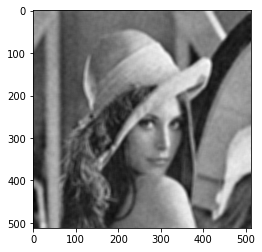

In [ ]:
def filtering(image,mask,k,pad_size):
    col,row = image.shape
    col,row = col-pad_size*2,row-pad_size*2 # 저장할 이미지 행렬 값 
    image = np.pad(image,1,'reflect')
    conv = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            conv[i][j] =  np.sum(image[i:i+k,j:j+k]*mask)
    return conv

image = cv2.imread(impath, cv2.IMREAD_GRAYSCALE) # image 읽기
noise = gaussian_noise(512,512) # noise 생성
gaussian_image = image + noise # noise 씌우기
filter_size = 9
pad_size = int(filter_size/2)
filter = gaussian_filter(filter_size,25) # filter 생성
mirror_image = mirror_pad(gaussian_image,pad_size) # mirror_padding한 image 생성
filtered_image = filtering(mirror_image,filter,filter_size,pad_size)
for i in range(100):
    mirrer_image = mirror_pad(filtered_image,pad_size)
    filtered_image = filtering(mirror_image,filter,filter_size,pad_size)
plt.imshow(filtered_image,cmap='gray') # 필터 된 이미지 출력

In [ ]:
print(filtered_image)
mirror_image = mirror_pad(filtered_image,pad_size)
filtered_image = filtering(mirror_image,filter,filter_size,pad_size)
print(filtered_image)

[[138.79558598 137.94265466 138.6930501  ... 129.25972848 128.36218
  121.65170757]
 [139.16640641 138.71716335 138.56913321 ... 129.47344109 128.58749616
  122.70515513]
 [138.19947934 138.44142287 137.87465116 ... 126.84693995 125.61521276
  119.69617081]
 ...
 [ 41.85749971  43.4070521   43.29957382 ...  74.26948841  74.20346721
   75.7940487 ]
 [ 40.04402029  41.72398567  41.79674259 ...  76.0985108   75.71844449
   77.05321328]
 [ 40.5349718   41.58584091  41.57041062 ...  78.40664966  77.38102079
   78.50432751]]
[[138.79558598 137.94265466 138.6930501  ... 129.25972848 128.36218
  121.65170757]
 [139.16640641 138.71716335 138.56913321 ... 129.47344109 128.58749616
  122.70515513]
 [138.19947934 138.44142287 137.87465116 ... 126.84693995 125.61521276
  119.69617081]
 ...
 [ 41.85749971  43.4070521   43.29957382 ...  74.26948841  74.20346721
   75.7940487 ]
 [ 40.04402029  41.72398567  41.79674259 ...  76.0985108   75.71844449
   77.05321328]
 [ 40.5349718   41.58584091  41.570410